In [26]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## US shapefile: County Level

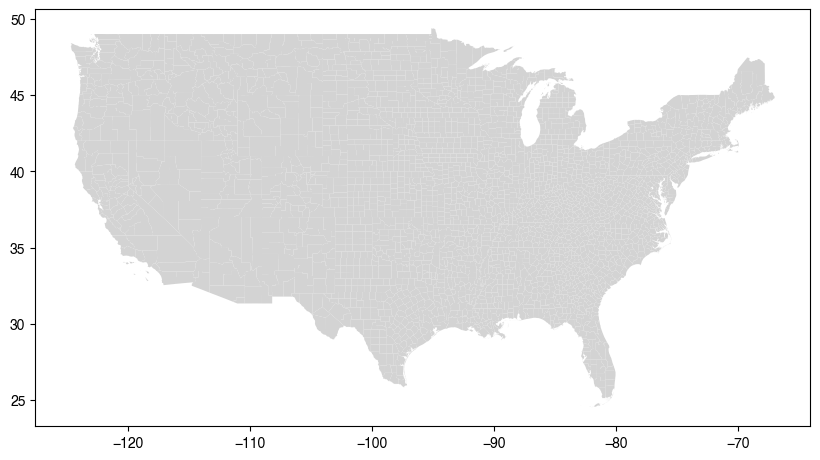

In [27]:
states = gpd.read_file('/Users/duan114/Downloads/Hearing loss project/coutinuous states_county level')
fig, ax = plt.subplots(figsize=(10, 10))
states.plot(ax=ax, color='lightgray', edgecolor=(0.5, 0.5, 0.5, 0.0))
plt.show()

In [28]:
states['FIPS'] = states['FIPS'].astype(int)

## US Hearing Loss Data (county level)

In [29]:
hlr = pd.read_csv('/Users/duan114/Downloads/Hearing loss project/hearing loss data/hlr_county.csv')

In [30]:
hlr = hlr.rename(columns={'County_FIPS': 'FIPS'})
hlr['pop']=hlr['male']+hlr['female']
hlr.sort_values(by='R',ascending=False)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,FIPS,B18102_002E,B18102_021E,B18102_001E,B18102_004E,B18102_003E,B18102_007E,...,F1834,F3564,F6475,F7500,male,female,maleR,femaleR,R,pop
2638,2638,2638,2638,48229,887,1478,2365,0,41,0,...,0.206522,0.077244,0.309211,0.589474,138,308,0.155581,0.208390,0.188584,446
1797,1797,1797,1797,35003,1866,1710,3576,0,26,0,...,0.000000,0.018209,0.121711,0.342183,451,165,0.241693,0.096491,0.172260,616
549,549,549,549,15005,26,18,44,0,1,0,...,0.000000,0.166667,0.000000,0.500000,3,4,0.115385,0.222222,0.159091,7
1429,1429,1429,1429,28055,400,381,781,0,28,0,...,0.000000,0.048951,0.117647,0.309524,89,28,0.222500,0.073491,0.149808,117
1752,1752,1752,1752,32009,480,501,981,0,6,0,...,0.000000,0.017065,0.036145,0.217391,126,13,0.262500,0.025948,0.141692,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,3195,3195,3195,72103,11177,12512,23689,0,496,0,...,0.000000,0.006373,0.027174,0.038154,169,109,0.015120,0.008712,0.011735,278
3186,3186,3186,3186,72085,17037,18426,35463,0,680,0,...,0.000000,0.004754,0.035749,0.044503,184,178,0.010800,0.009660,0.010208,362
3190,3190,3190,3190,72093,2577,2812,5389,0,113,0,...,0.000000,0.000000,0.000000,0.032491,32,9,0.012418,0.003201,0.007608,41
2658,2658,2658,2658,48269,114,115,229,0,8,0,...,0.000000,0.000000,NaN,0.000000,1,0,0.008772,0.000000,0.004367,1


## US hearing loss rate map

In [31]:
columns_to_keep = ['FIPS', 'male','female','pop','maleR','femaleR','R']
df = hlr[columns_to_keep]
gdf = states.merge(df, on='FIPS', how='left')

In [32]:
gdf.isnull().any().any()

False

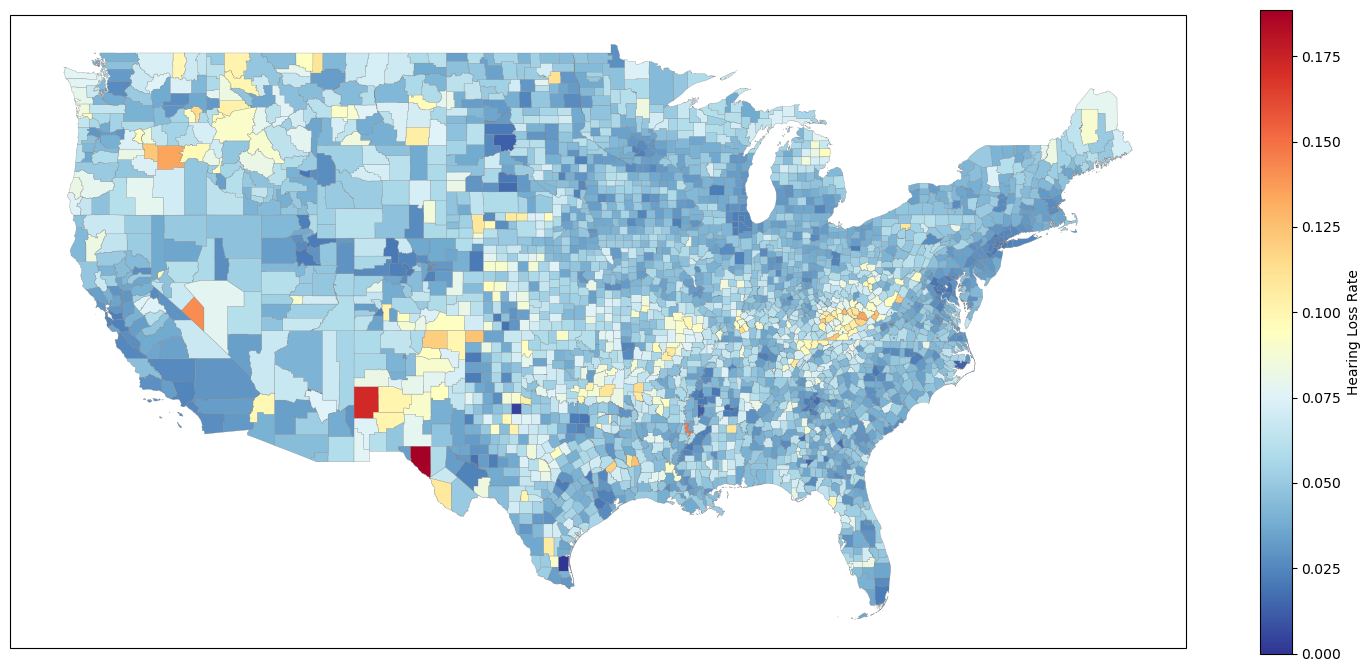

In [15]:
# US hearing loss rate visualizaiton
fig, ax = plt.subplots(figsize=(15, 12), subplot_kw={'projection': ccrs.PlateCarree()})
gdf.plot(column='R', cmap='RdYlBu_r', edgecolor='gray', linewidth=0.2, ax=ax, legend=True, legend_kwds={'shrink': 0.55, 'label': 'Hearing Loss Rate'})
plt.tight_layout() 
plt.show()

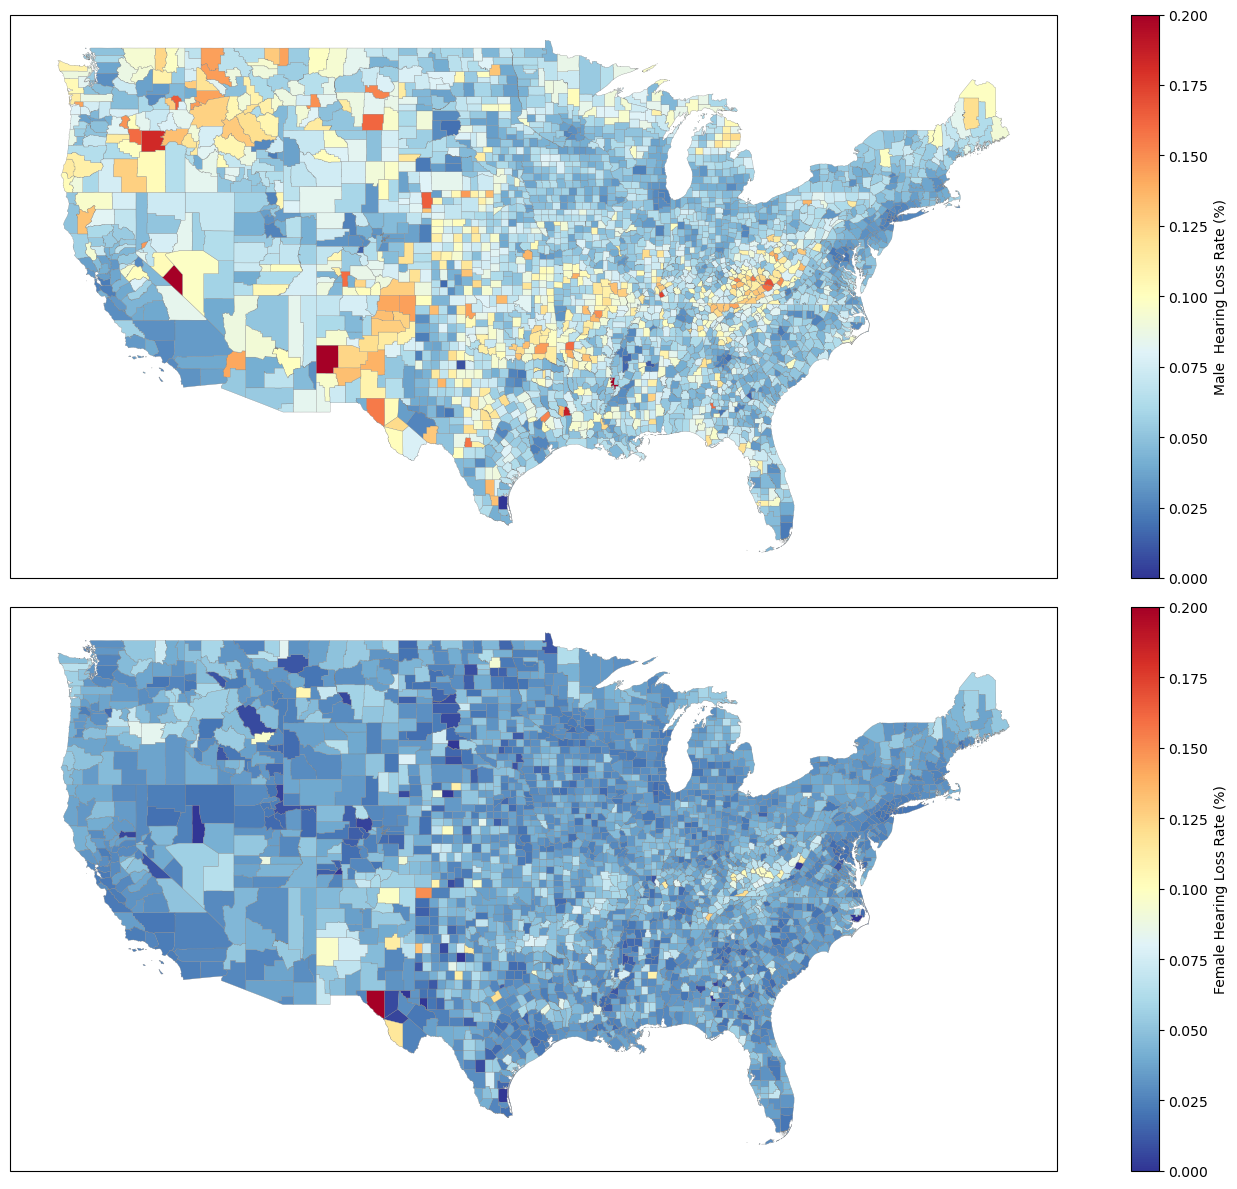

In [16]:
norm = mcolors.Normalize(vmin=0, vmax=0.2)
fig, axs = plt.subplots(2, 1, figsize=(15, 12), subplot_kw={'projection': ccrs.PlateCarree()})
axs = axs.flatten()
# male hlr
gdf.plot(column='maleR', cmap='RdYlBu_r', edgecolor='gray', linewidth=0.2, ax=axs[0], legend=True, legend_kwds={'shrink': 1, 'label': 'Male  Hearing Loss Rate (%)'}, norm=norm)
# female hlr
gdf.plot(column='femaleR', cmap='RdYlBu_r', edgecolor='gray', linewidth=0.2, ax=axs[1], legend=True, legend_kwds={'shrink': 1, 'label': 'Female Hearing Loss Rate (%)'}, norm=norm)
plt.tight_layout()
plt.show()


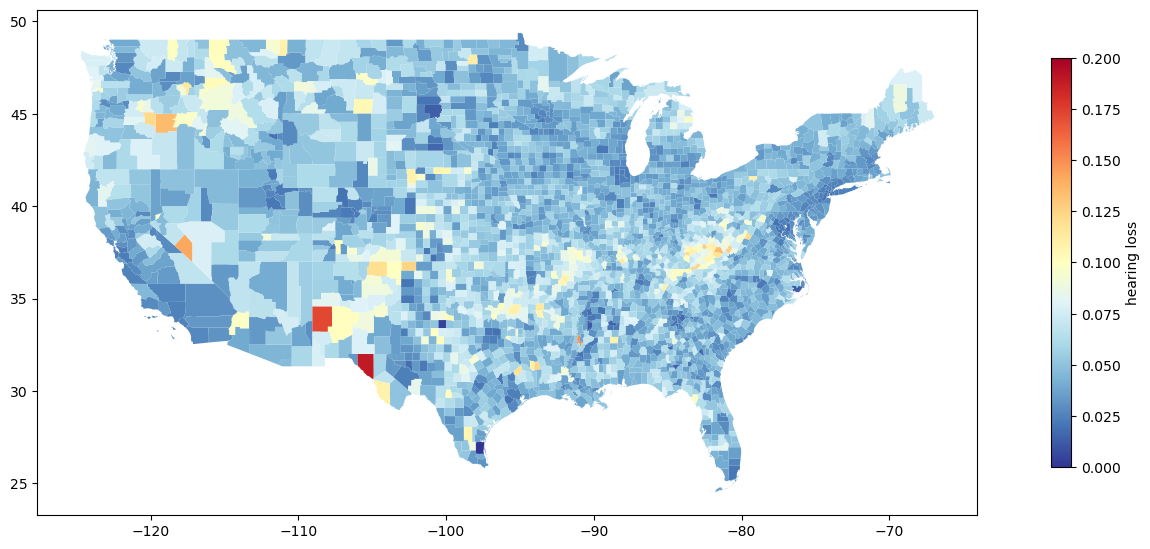

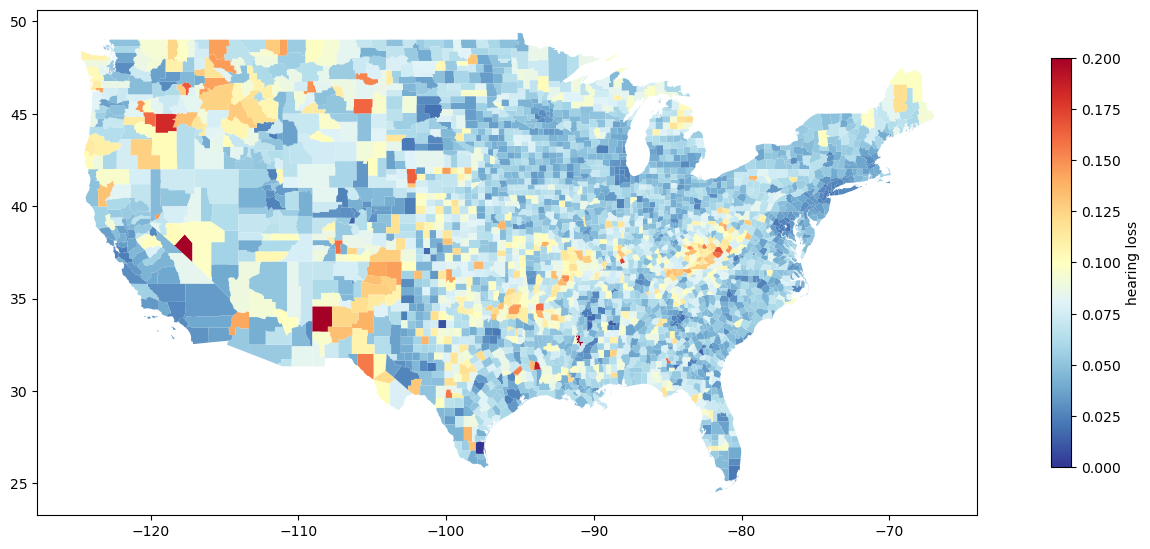

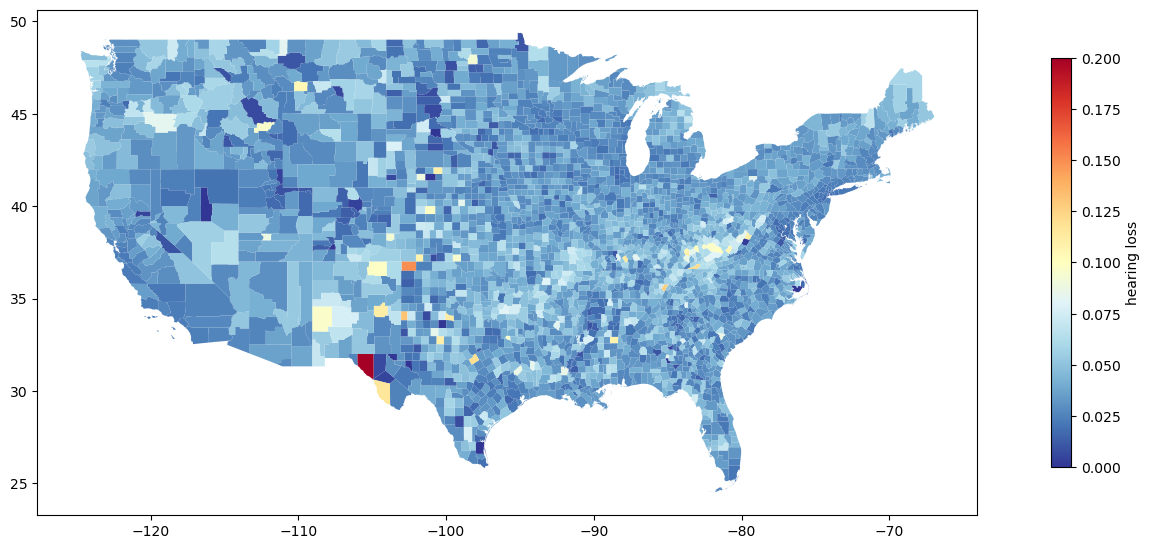

In [17]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

columns_to_plot = ['R', 'maleR', 'femaleR']
titles = ['US hearing loss rate', 'US male hearing loss rate', 'US female hearing loss rate']

for idx, column in enumerate(columns_to_plot):
    fig, ax = plt.subplots(figsize=(15, 12))

    norm = mcolors.Normalize(vmin=0, vmax=0.2)
    gdf.plot(column=column, cmap='RdYlBu_r', edgecolor=(0.5, 0.5, 0.5, 0.0), linewidth=0.2, ax=ax, legend=True, legend_kwds={'shrink': 0.35, 'label': 'hearing loss'}, norm=norm)
    divider = make_axes_locatable(ax)
 
    plt.tight_layout()
    plt.show()


# Moran's I

In [33]:
from sodapy import Socrata
import contextily as ctx

import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

import matplotlib.pyplot as plt
import plotly.express as px

In [34]:
import geopandas as gpd

In [35]:
gdf = gdf.to_crs(epsg=3857)
# calculate spatial weight
wq =  lps.weights.KNN.from_dataframe(gdf,k=8)
# Row-standardization
wq.transform = 'r'
#calculate lag_value
gdf['R_lag'] = lps.weights.lag_spatial(wq, gdf['R'])
gdf['R_diff'] = gdf['R'] - gdf['R_lag']

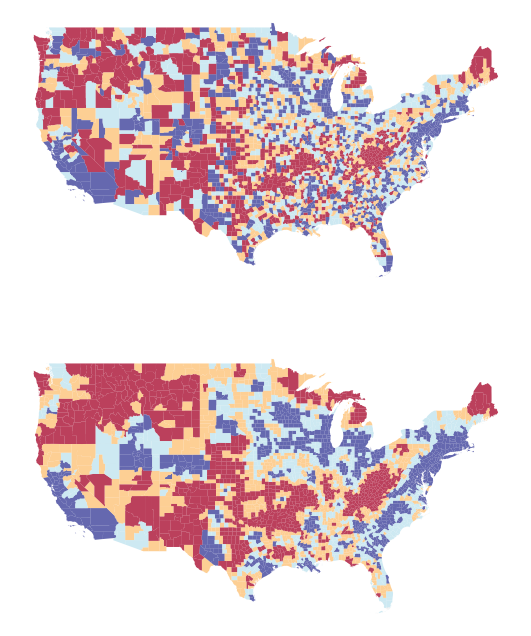

In [36]:
# create the 1x2 subplots
fig, ax = plt.subplots(2, 1, figsize=(15, 8))

# regular count map on the left
gdf.plot(ax=ax[0], # this assigns the map to the left subplot
         column='R', 
         cmap='RdYlBu_r', 
         scheme='quantiles',
         k=4, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75, 
         legend=False,  
         legend_kwds={'loc': 'lower right'}  
         )

ax[0].axis("off")
#ax[0].set_title("U.S. county hearing loss rate")

# spatial lag map on the right
gdf.plot(ax=ax[1], # this assigns the map to the right subplot
         column='R_lag', 
         cmap='RdYlBu_r', 
         scheme='quantiles',
         k=4, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75,
         legend=False,  
         legend_kwds={'loc': 'lower right'}  
        )

ax[1].axis("off")
#ax[1].set_title("U.S. county hearing loss rate lag")

plt.show()

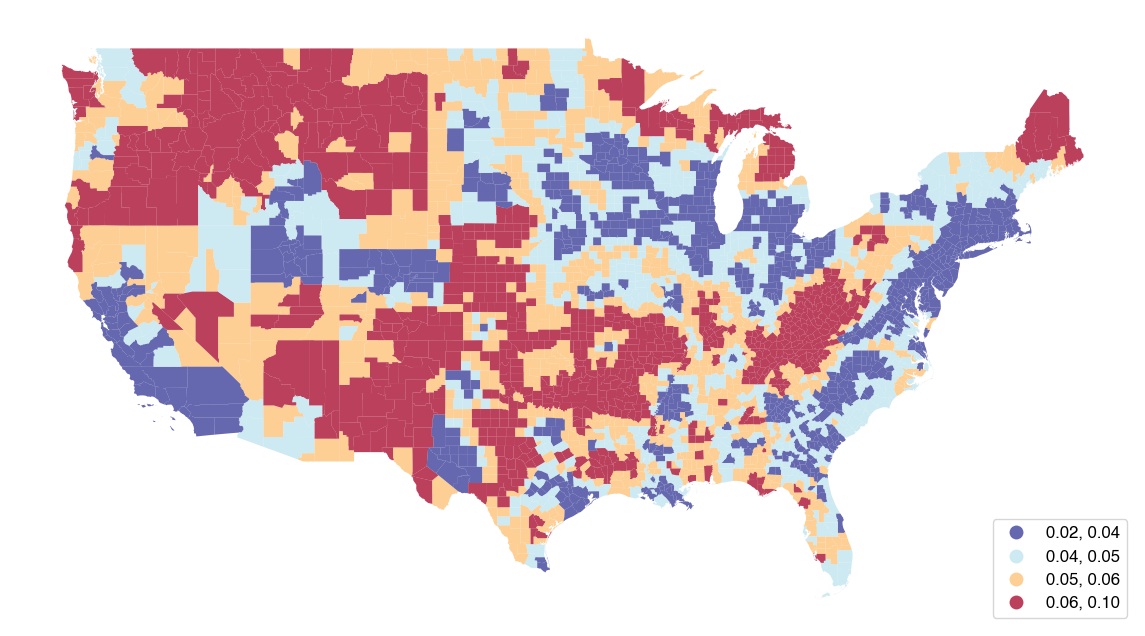

In [37]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# spatial lag map
#plt.colormaps()
gdf.plot(ax=ax, # assigns the map to the subplot
         column='R_lag', 
         cmap='RdYlBu_r', 
         scheme='quantiles',
         k=4, 
         edgecolor='gray', 
         linewidth=0, 
         alpha=0.75,
         legend=True, 
         legend_kwds={'loc': 'lower right', 'prop': {'size': 12}} 
         )

ax.axis("off")
plt.show()

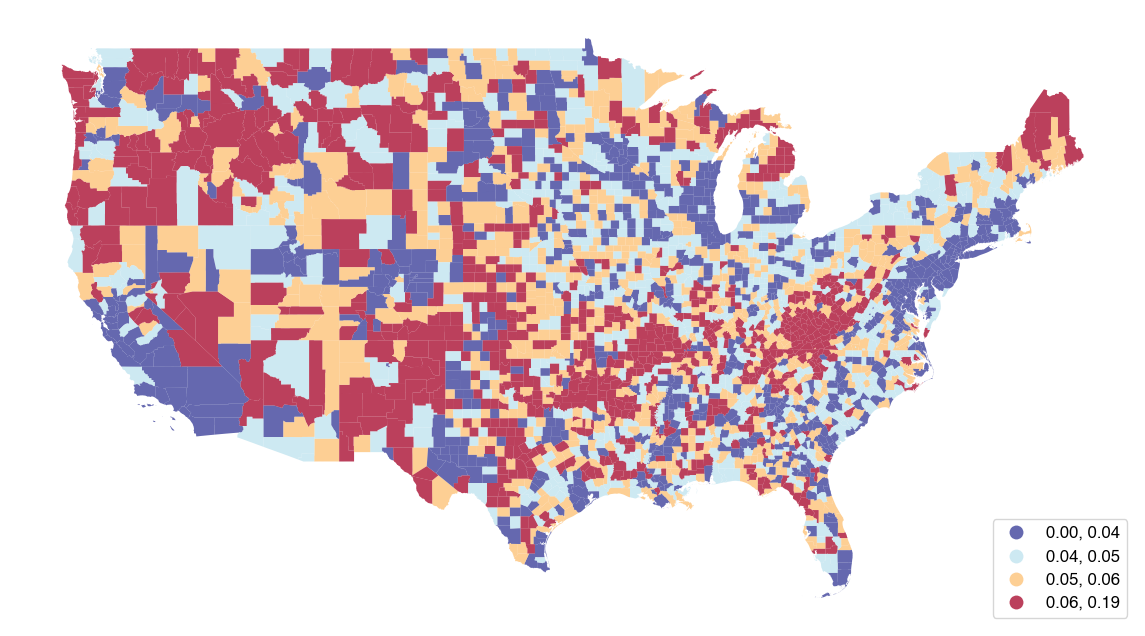

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# spatial lag map
#plt.colormaps()
gdf.plot(ax=ax, # assigns the map to the subplot
         column='R', 
         cmap='RdYlBu_r', 
         scheme='quantiles',
         k=4, 
         edgecolor='gray', 
         linewidth=0, 
         alpha=0.75,
         legend=True, 
         legend_kwds={'loc': 'lower right', 'prop': {'size': 12}} 
         )

ax.axis("off")
plt.show()

In [39]:
y = gdf.R
moran = Moran(y, wq)
print(moran.I)
print(moran.p_sim)

0.39209371707962326
0.001


### Local Indicator of Spatial Correlation

In [40]:
lisa = esda.moran.Moran_Local(y, wq)

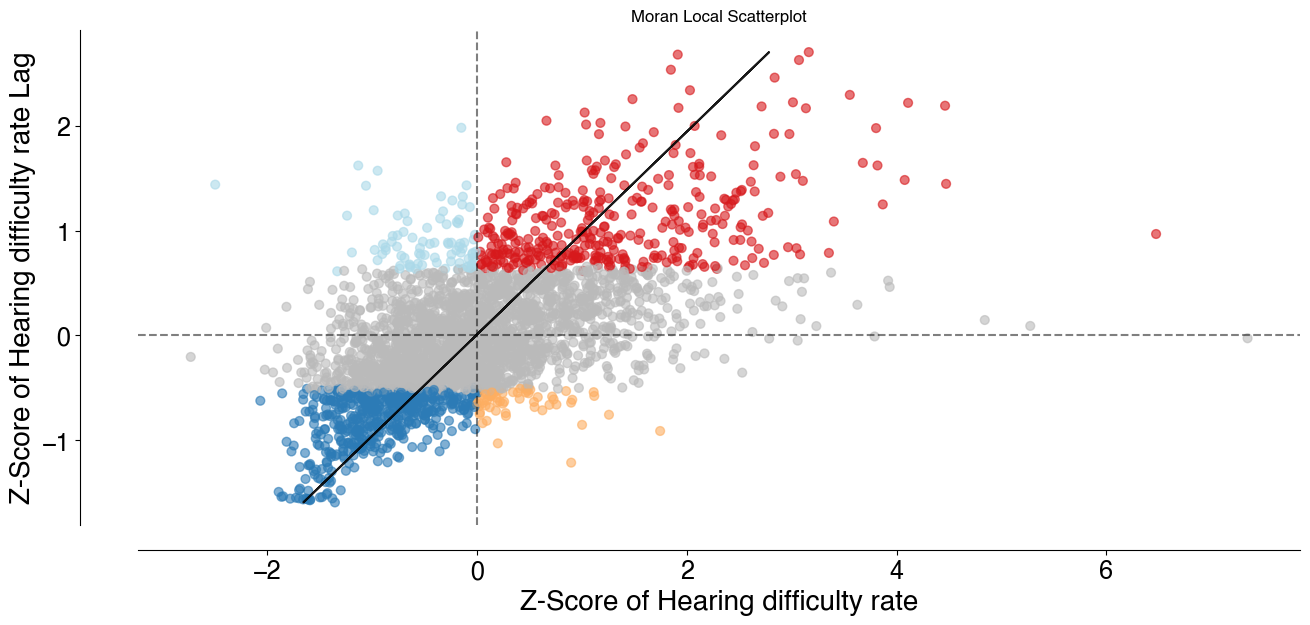

In [47]:
fig, ax = plt.subplots(figsize=(15, 8))
moran_scatterplot(lisa, ax=ax, p=0.05)
ax.set_xlabel('Z-Score of Hearing difficulty rate', fontsize=20)
ax.set_ylabel('Z-Score of Hearing difficulty rate Lag', fontsize=20)


ax.tick_params(axis='both', which='major', labelsize=18)

plt.savefig('/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/paper writing/Images/LISA.png')
plt.show()
